ACT 1 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#JALAMOS DATASET
df = pd.read_csv('NEWYORK_SINATIPICOS1.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36322 non-null  float64
 1   listing_url                                   36322 non-null  object 
 2   scrape_id                                     36322 non-null  float64
 3   last_scraped                                  36322 non-null  object 
 4   source                                        36322 non-null  object 
 5   name                                          36322 non-null  object 
 6   description                                   36322 non-null  object 
 7   neighborhood_overview                         36322 non-null  object 
 8   picture_url                                   36322 non-null  object 
 9   host_id                                       36322 non-null 

In [8]:
print(df.columns.tolist())


['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [9]:
# 1) Filtrar solo anuncios de tipo "Hotel room"
hotel_df = df[df["room_type"] == "Hotel room"].copy()
print(hotel_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 74 to 35961
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            335 non-null    float64
 1   listing_url                                   335 non-null    object 
 2   scrape_id                                     335 non-null    float64
 3   last_scraped                                  335 non-null    object 
 4   source                                        335 non-null    object 
 5   name                                          335 non-null    object 
 6   description                                   335 non-null    object 
 7   neighborhood_overview                         335 non-null    object 
 8   picture_url                                   335 non-null    object 
 9   host_id                                       335 non-null    float

In [10]:
#  Asegurar que las columnas sean numéricas
hotel_df["price"] = (
    hotel_df["price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

hotel_df["host_acceptance_rate"] = (
    hotel_df["host_acceptance_rate"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .astype(float)
)

In [11]:
#  Quitar columnas problemáticas:
#   - sin datos suficientes (<2 no nulos)
#   - sin variación (nunique<=1)
bad = [c for c in num.columns if (num[c].count() < 2) or (num[c].nunique(dropna=True) <= 1)]

# (opcional) quitar identificadores que no tienen sentido en correlación
bad += [c for c in ["id","scrape_id","host_id"] if c in num.columns]

num = num.drop(columns=list(set(bad)))


NameError: name 'num' is not defined

In [ ]:
# quitar IDs y columnas malas
drop_ids = [c for c in ["id","scrape_id","host_id"] if c in num.columns]
bad = [c for c in num.columns if (num[c].count()<2) or (num[c].nunique(dropna=True)<=1)]
num = num.drop(columns=list(set(drop_ids+bad)))

# --- Correlación bonita ---
corr = num.corr().round(2)


display(corr)  # tabla tipo DataFrame, no texto

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,price,maximum_nights,minimum_maximum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
host_response_rate,1.00,-0.03,-0.74,-0.67,0.07,0.11,0.10,-0.02,0.72,-0.50,...,-0.25,-0.25,-0.25,-0.25,-0.25,-0.26,-0.72,0.12,0.07,0.06
host_acceptance_rate,-0.03,1.00,0.12,0.13,-0.12,0.12,-0.05,0.07,-0.08,0.05,...,0.05,0.06,0.06,0.06,0.05,0.05,0.13,0.41,0.12,0.10
host_listings_count,-0.74,0.12,1.00,0.98,-0.07,0.11,-0.11,0.01,-0.71,0.62,...,0.38,0.38,0.37,0.37,0.37,0.39,0.98,-0.16,0.32,0.19
host_total_listings_count,-0.67,0.13,0.98,1.00,-0.06,0.11,-0.11,-0.01,-0.71,0.60,...,0.42,0.41,0.40,0.40,0.40,0.42,0.96,-0.16,0.32,0.19
latitude,0.07,-0.12,-0.07,-0.06,1.00,0.55,0.04,0.06,0.12,-0.18,...,0.08,0.08,0.05,0.08,0.07,0.05,-0.07,-0.04,0.05,-0.04
longitude,0.11,0.12,0.11,0.11,0.55,1.00,-0.01,0.10,-0.03,0.08,...,0.13,0.12,0.09,0.12,0.09,0.09,0.10,0.12,0.17,0.06
accommodates,0.10,-0.05,-0.11,-0.11,0.04,-0.01,1.00,-0.07,0.09,-0.08,...,-0.12,-0.12,-0.11,-0.12,-0.11,-0.12,-0.09,0.12,-0.11,-0.04
price,-0.02,0.07,0.01,-0.01,0.06,0.10,-0.07,1.00,-0.07,0.04,...,0.25,0.25,0.25,0.25,0.25,0.25,0.00,-0.06,-0.00,0.15
maximum_nights,0.72,-0.08,-0.71,-0.71,0.12,-0.03,0.09,-0.07,1.00,-0.72,...,-0.47,-0.46,-0.47,-0.47,-0.46,-0.47,-0.71,0.01,-0.08,-0.05
minimum_maximum_nights,-0.50,0.05,0.62,0.60,-0.18,0.08,-0.08,0.04,-0.72,1.00,...,0.40,0.40,0.40,0.40,0.39,0.40,0.60,0.09,0.14,0.13


In [ ]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,price,maximum_nights,minimum_maximum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
host_response_rate,1.000000,0.025401,0.736884,0.666257,0.073208,0.108022,0.095258,0.024947,0.721840,0.500452,...,0.253217,0.253890,0.245183,0.247894,0.246116,0.260716,0.717309,0.116554,0.071719,0.062750
host_acceptance_rate,0.025401,1.000000,0.120509,0.125348,0.122838,0.115215,0.048757,0.067038,0.076077,0.051634,...,0.053942,0.056661,0.058087,0.057592,0.046490,0.052695,0.128269,0.414459,0.118035,0.097377
host_listings_count,0.736884,0.120509,1.000000,0.981567,0.066361,0.108894,0.110954,0.005401,0.705293,0.617090,...,0.383045,0.379480,0.368932,0.371130,0.371207,0.388538,0.982110,0.158240,0.319058,0.189753
host_total_listings_count,0.666257,0.125348,0.981567,1.000000,0.063884,0.107376,0.114294,0.006144,0.707410,0.604170,...,0.415079,0.411076,0.401529,0.404170,0.404582,0.421945,0.964994,0.159468,0.321312,0.192103
latitude,0.073208,0.122838,0.066361,0.063884,1.000000,0.549494,0.035567,0.056684,0.116655,0.184385,...,0.075457,0.084175,0.049782,0.080796,0.065464,0.050103,0.070966,0.044222,0.053110,0.039762
longitude,0.108022,0.115215,0.108894,0.107376,0.549494,1.000000,0.009874,0.102212,0.029508,0.078396,...,0.125645,0.120135,0.091867,0.119861,0.093661,0.093601,0.100079,0.117209,0.173853,0.059994
accommodates,0.095258,0.048757,0.110954,0.114294,0.035567,0.009874,1.000000,0.072344,0.091776,0.082819,...,0.115866,0.119658,0.114853,0.116551,0.114252,0.115286,0.093449,0.117256,0.108812,0.036646
price,0.024947,0.067038,0.005401,0.006144,0.056684,0.102212,0.072344,1.000000,0.074939,0.037107,...,0.246475,0.249824,0.250013,0.251395,0.254659,0.251247,0.002007,0.058633,0.001200,0.149826
maximum_nights,0.721840,0.076077,0.705293,0.707410,0.116655,0.029508,0.091776,0.074939,1.000000,0.720368,...,0.467138,0.462913,0.467911,0.466684,0.459052,0.473916,0.710329,0.007800,0.081187,0.049751
minimum_maximum_nights,0.500452,0.051634,0.617090,0.604170,0.184385,0.078396,0.082819,0.037107,0.720368,1.000000,...,0.402410,0.398529,0.400093,0.396575,0.389859,0.401544,0.598788,0.088229,0.138188,0.127278


In [12]:
hotel_df[["availability_365", "number_of_reviews"]].corr()


,availability_365,number_of_reviews
availability_365,1.0000,-0.1787
number_of_reviews,-0.1787,1.0000


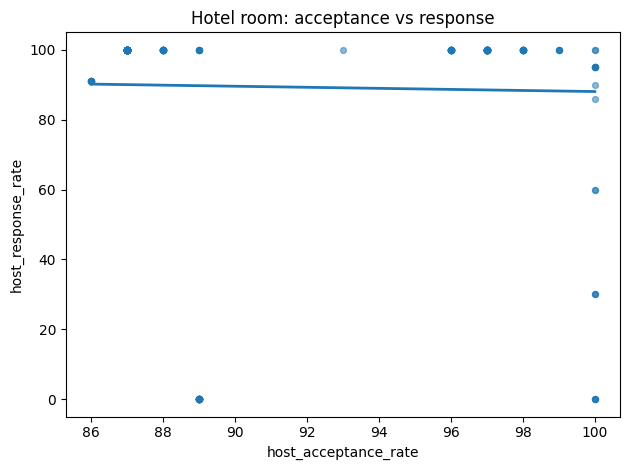

In [15]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

d = hotel_df.copy()
rt = 'room_type' if 'room_type' in d.columns else 'room type'  # nombre correcto
for c in ['host_acceptance_rate','host_response_rate']:
    d[c] = pd.to_numeric(d[c].astype(str).str.replace('%',''), errors='coerce')

hotel = d.loc[d[rt].astype(str).str.lower().eq('hotel room'),
              ['host_acceptance_rate','host_response_rate']].dropna()

sns.regplot(x='host_acceptance_rate', y='host_response_rate', data=hotel,
            scatter_kws={'s':18, 'alpha':.5}, line_kws={'linewidth':2}, ci=None)
plt.title('Hotel room: acceptance vs response')
plt.xlabel('host_acceptance_rate'); plt.ylabel('host_response_rate')
plt.tight_layout(); plt.show()







